Pymaceuticals Inc.
---
Analysis

Thank you for the opportunity to analyze the data you have produced in your study of these various drugs on the size of tumors in mice. With almost 250 mice participating in the trial and just under 2,000 observations made at different timepoints in the study, there is a nice amount of information to be studied here.
As can be seen from the first set a bar charts, there was some variance in how much each drug was observed, but even the drug with the least observations, Propriva, had 148 observations. The mice were an almost even balance of male to female, with the exact split being 50.4% to 49,6%.
A quick look at the summary table shows us that the means and the median Tumor Volume (mm3) per drug regimen were very close with only two of the drug regimens having means and medians between 40.2 and 41.6, and the rest of them having the means and medians fall between 50.4 – 55.25. There is a much greater range in the variance. The box plots provided show the distribution of the measured volume of the tumors. The drug regimins chosen for this analysis include the two with the lower means and medians, Capomulin, Ramicane, and two others, Infubinol, Ceftamin, who were in the group with the higher averages. Only InfubinJHol had any outliers.
There was a strong correlation measured between the tumor volume and the weight of the mice who were treated with Capomulin.  



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# import numpy as np
# from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_df= pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how = 'outer')

# Display the data table for preview
mouse_df.head()

# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [2]:
mouse_df.shape


(1893, 8)

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df_dupe = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
#mouse_df_dupe = mouse_df.groupby(['Mouse ID', 'Timepoint']).value_counts() 
mouse_df_dupe.head(30)                       

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df_dupe.head(30)    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_df[mouse_df['Mouse ID'] != 'g989']
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_mean = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_med = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_var = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_std = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_sem = mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
drug_sum_table = pd.DataFrame({'Mean Tumor Volume': drug_mean, 'Median Tumor Volume': drug_med, 'Tumor Volume Variance': drug_var, 'Tumor Volume Std Dev': drug_std, 'Tumor Volume Std. Err.': drug_sem})
drug_sum_table





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

drug_sum_table2 = mouse_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

#.rename_axis('Tumor Volume (mm3)', axis=1)

drug_sum_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

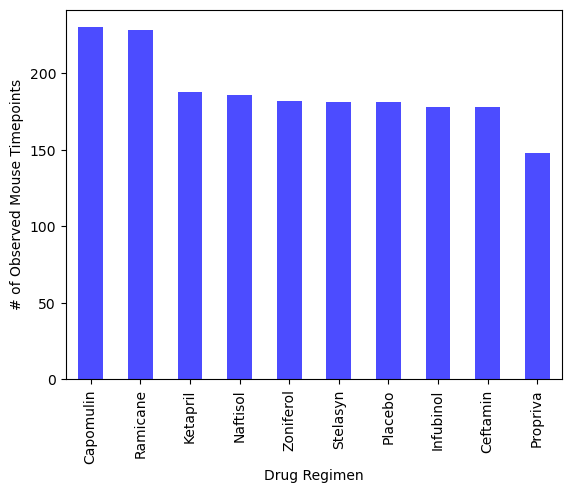

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_drug_count = mouse_clean['Drug Regimen'].value_counts()
mouse_pd_chart = mouse_drug_count.plot.bar(x='mouse_drug_count[0]', y='mouse_drug_count[1]', color='blue', alpha=.7)
mouse_pd_chart.set_xlabel('Drug Regimen')
mouse_pd_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()
plt.tight_layout()



In [25]:
pro_usage = mouse_clean['Drug Regimen'].value_counts()['Propriva']
pro_usage

148

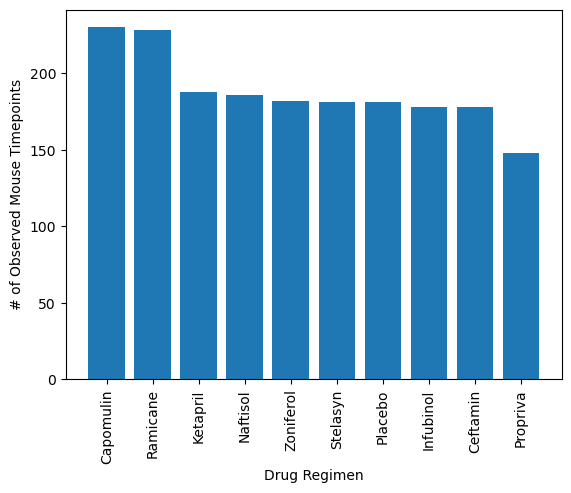

In [10]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.¶

plt.bar(mouse_drug_count.index.values, mouse_drug_count.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='count'>

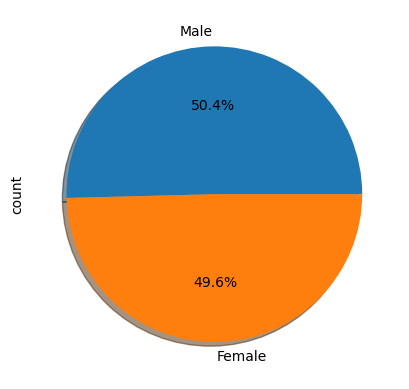

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_clean2= mouse_clean[['Mouse ID', 'Sex']].drop_duplicates(keep = 'first') 
mouse_sex_count = mouse_clean2['Sex'].value_counts()
mouse_sex_count.plot(kind='pie', y='Sex', autopct='%1.1f%%', shadow=True)

<function matplotlib.pyplot.show(close=None, block=None)>

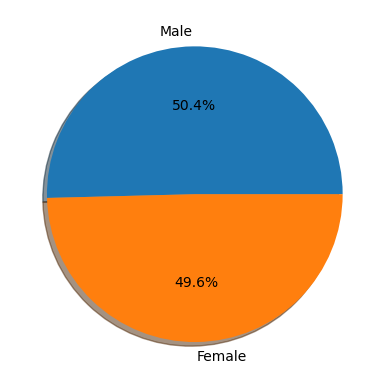

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#mouse_sex_count = mouse_clean['Sex'].value_counts()
mouse_sex = mouse_sex_count.index.values
mouse_sex_amt = mouse_sex_count.values
plt.pie(mouse_sex_amt, labels=mouse_sex, autopct='%1.1f%%', shadow=True)
plt.show



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

last_measure = mouse_clean.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
last_measure 

# last_measure = last_measure.loc[(last_measure['Drug Regimen']=='Capomulin') | 
#                                 (last_measure['Drug Regimen']=='Ramicane') | 
#                                 (last_measure['Drug Regimen']=='Infubinol') | 
#                                 (last_measure['Drug Regimen']=='Ceftamin')]
last_measure = last_measure.reset_index()

last_measure = mouse_clean.groupby('Mouse ID')['Timepoint'].max()
last_measure = last_measure.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_measure= pd.merge(last_measure, mouse_clean, on=['Timepoint', 'Mouse ID'], how='inner')

last_measure.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []

tumor_vol_by_treat = {}
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset
    
    # Determine outliers using upper and lower bounds


for treatment in treatment_list:
    final_tumor_vol = last_measure.loc[last_measure['Drug Regimen']==treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)
    tumor_vol_by_treat[treatment]= final_tumor_vol
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq= quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5* iqr)
    outliers =final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potentional outliers: {outliers}")
    
    
#     orange_out = dict(markerfacecolor='red',markersize=12)
#     plt.boxplot(tumor_vol, labels = treatment_list,flierprops=orange_out)
#     plt.ylabel('Final Tumor Volume (mm3)')
#     plt.show() 
print(tumor_vol) 
    
   


Capomulin's potentional outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potentional outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potentional outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potentional outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.37

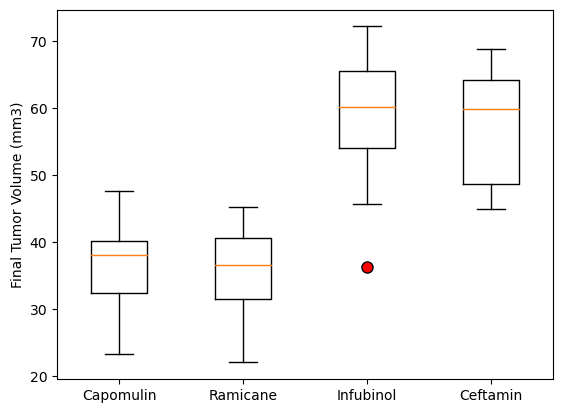

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

orange_out = dict(markerfacecolor='red',markersize=8)
plt.boxplot(tumor_vol, labels= treatment_list, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show() 

## Line and Scatter Plots

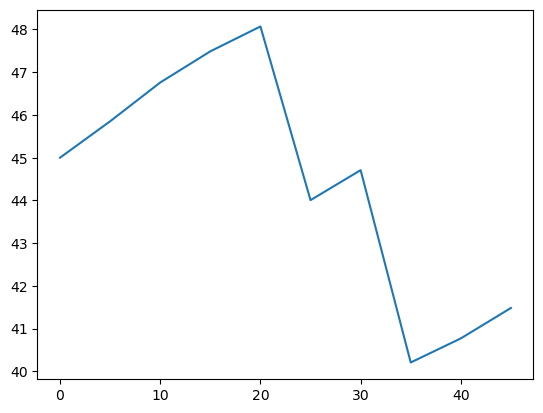

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin 
just_capomulin = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin']
M_data =  just_capomulin.loc[just_capomulin['Mouse ID']== 'l509']
plt.plot(M_data['Timepoint'], M_data['Tumor Volume (mm3)'])


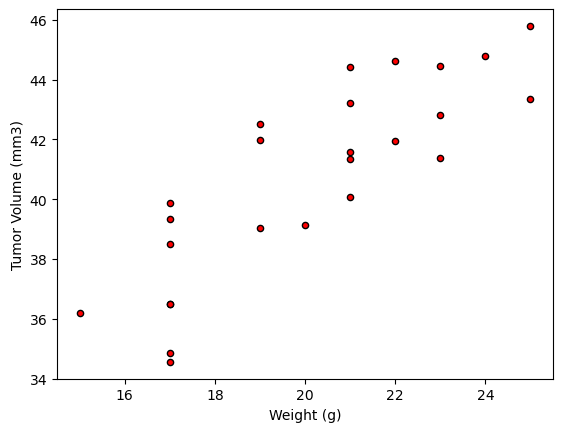

In [134]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin']
capomulin_data2 = capomulin_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

ax1 = capomulin_data2.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', color='red', edgecolors='black')



## Correlation and Regression

The correlation between mouse weight and the average tumor is 0.84


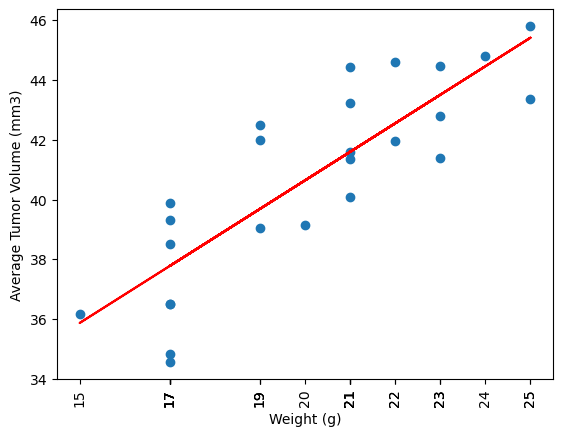

In [145]:
weight = capomulin_data2['Weight (g)']
tumor_vol2 = capomulin_data2['Tumor Volume (mm3)']


correlation = st.pearsonr(weight, tumor_vol2)

print(f"The correlation between mouse weight and the average tumor is {round(correlation[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, tumor_vol2)

pe_fit = pe_slope * weight + pe_int


plt.scatter(weight, tumor_vol2)
plt.plot(weight,pe_fit, color = 'red')
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
